## 分类

**降至一维**

In [1]:
import numpy as np
import pandas as pd
dt = pd.read_csv('/Users/apple/Documents/Jupytor_Notebook/ai_programming/5.7/实验8降维回归和分类/wdbc.csv')
dt1 = dt.iloc[:,2:12]
dt2 = dt.iloc[:,1]

In [2]:
from sklearn import manifold
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline
tsne = manifold.TSNE(n_components=1,init='pca')
d1_t = tsne.fit_transform(dt1)

In [3]:
dt2 = dt2.replace('M',1)
dt2 = dt2.replace('B',0)
dt2.head()

0    1
1    1
2    1
3    1
4    1
Name: result, dtype: int64

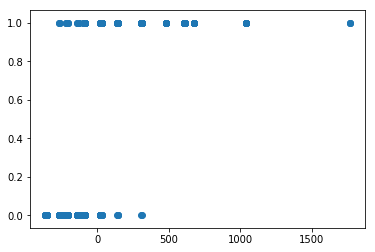

In [4]:
plt.scatter(d1_t , dt2)

**可见降至一维后不适合分类**

In [5]:
from sklearn.svm import SVC
vc = SVC(C = 0.6 , gamma = 'auto')

In [6]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(d1_t , dt2, test_size = 0.1, random_state = 1)

In [7]:
r = vc.fit(x_train , y_train )

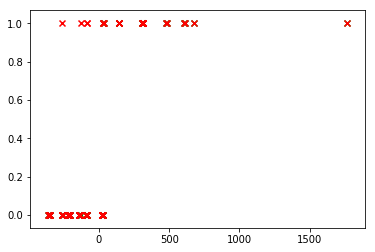

In [8]:
plt.scatter(x_test , vc.predict(x_test) , marker='x',c='g')
plt.scatter(x_test , y_test , marker='x',c='r')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

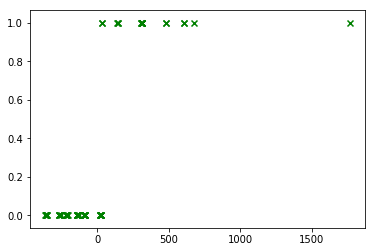

In [9]:
plt.scatter(x_test , vc.predict(x_test) , marker='x',c='g')
plt.show

**降至二维**

In [10]:
tsne1 = manifold.TSNE(n_components=2,init='pca')
dt_1 = tsne1.fit_transform(dt1)
from sklearn.model_selection import train_test_split 
x_train1, x_test1, y_train1, y_test1 = train_test_split(dt_1 , dt2, test_size = 0.1, random_state = 1)
re = vc.fit(x_train1 , y_train1 )

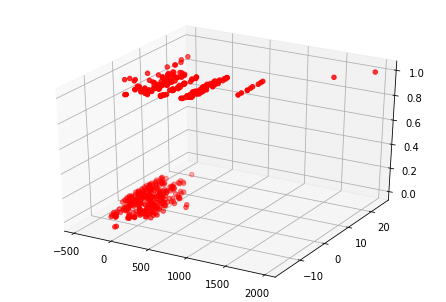

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure() 
ax = Axes3D(fig) 
ax.scatter([i[0] for i in x_train1] , [i[1] for i in x_train1] , y_train1 , c = 'r')
plt.show()

In [12]:
ax1 = [i[0] for i in x_test1]
ax2 = [i[1] for i in x_test1]

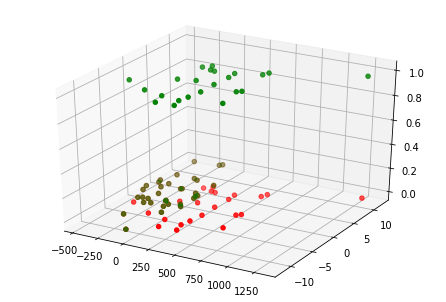

In [13]:
res = re.predict(x_test1)
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure() 
ax = Axes3D(fig) 
ax.scatter(ax1 , ax2 , res , c = 'r')
ax.scatter(ax1 , ax2 , y_test1 , c = 'g')
plt.show()

**降至二维同样不适合分类**

### 牛顿法，不降维

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

clf = LogisticRegression(random_state=0, solver='newton-cg',multi_class='multinomial')
x_train2, x_test2, y_train2, y_test2 = train_test_split(dt1 , dt2, test_size = 0.1, random_state = 1)
sul = clf.fit(x_train2 , y_train2)

In [15]:
clf.score(x_train2 , y_train2)

0.919921875

In [16]:
clf.score(x_test2 , y_test2)

0.8771929824561403

In [17]:
counter = 0
for i in range(len(y_test2)):
    if(clf.predict(x_test2)[i] == np.array(y_test2)[i]):
        counter += 1
counter/len(y_test2)

0.8771929824561403

### SVC

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 

clf = SVC(gamma='auto')
cl = clf.fit(x_train2, y_train2) 

In [19]:
cl.score(x_train2 , y_train2)

0.98828125

In [21]:
cl.score(x_test2 , y_test2)

0.7017543859649122

**可见降维对数据特征损失较大，虽然降维后在学习时速度较快，但并不是所有时候都适合用降维**